<a href="https://colab.research.google.com/github/stepkurniawan/network-analysis-wikipedia-journals/blob/main/2_Data_preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import itertools

In [ ]:
df_journal = pd.read_csv('df_journal.csv')

In [ ]:
df_journal.columns

Index(['page_title', 'journal_name'], dtype='object')

In [ ]:
g = nx.Graph()

In [ ]:
def draw_network(graph, seed=42):
    nx.draw(graph, pos=nx.spring_layout(graph, seed=seed),
            with_labels=True, node_size=1000)

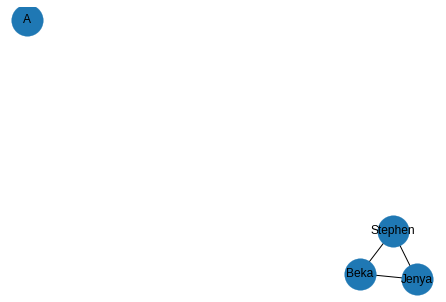

In [ ]:
g.add_edges_from([['Stephen', 'Jenya'], ['Stephen', 'Beka'], ['Beka', 'Jenya']])
g.add_edges_from([['Stephen', 'Jenya'], ['Stephen', 'Jenya']])
g.add_nodes_from(['A'])
#, 'Jenya'], ['Stephen', 'Beka'], ['Beka', 'Jenya']])
draw_network(g)

In [ ]:
df_journal = pd.read_csv('df_journal.csv')
df_journal

,page_title,journal_name
0,Aceria clianthi,Weta
1,Thirdperson pronoun,w
2,Eoentelodon,transl
3,Madanjeet Singh,subst
4,List of television stations in Mississippi,req
...,...,...
2014693,Virtual fixture,NaN
2014694,Education in Brazil,NaN
2014695,Qormi,NaN
2014696,Hitta J3,NaN


In [ ]:
df_journal.nunique()

page_title      486737
journal_name    182236
dtype: int64

In [ ]:
#G = nx.from_pandas_edgelist(df_journal, 'page_title', 'journal_name')

In [ ]:
# from matplotlib.pyplot import figure
# figure(figsize=(10, 8))
# nx.draw_shell(G, with_labels=True)

In [ ]:
df_sample_journal_data = pd.DataFrame(np.array([['p1', 'j1'],['p1', 'j2'], ['p1', 'j3'], ['p2', 'j1'], ['p2', 'j2']]),
                   columns=['page_title', 'journal_name'])
df_sample_journal_data

,page_title,journal_name
0,p1,j1
1,p1,j2
2,p1,j3
3,p2,j1
4,p2,j2


In [ ]:
# df_groupby = df_sample_journal_data.groupby('page_title')['journal_name'].apply(lambda x: ', '.join(x))
df_groupby = df_sample_journal_data.groupby('page_title')['journal_name'].apply(list)

df_groupby

page_title
p1    [j1, j2, j3]
p2        [j1, j2]
Name: journal_name, dtype: object

In [ ]:
iterations_sample = itertools.combinations(df_groupby['p1'], 2)
print(iterations_sample)
for i in iterations_sample:
    print(i)

('j1', 'j2')
('j1', 'j3')
('j2', 'j3')


In [ ]:
df_groupby = df_journal.groupby('page_title')['journal_name'].apply(list)
df_groupby

page_title
 Amelasorbus                          [Journal of the Arnold Arboretum]
 Astrolista                                                  [Bradleya]
 Ayumi Hamasaki EP                                             [Oricon]
 Chitalpa                                                 [HortScience]
 Crataemespilus              [Botanical Journal of the Linnean Society]
                                            ...                        
Ḫattušili III                                       [Anatolian Studies]
Ṅa Indic              [The Journal of the Royal Asiatic Society of G...
Ṭa Indic              [The Journal of the Royal Asiatic Society of G...
Ẓāʾ                                                          [Language]
Ọbatala                                             [Material Religion]
Name: journal_name, Length: 486737, dtype: object

In [ ]:
# find combination of all the journal name

iterations = itertools.combinations(df_groupby[2], 2)

for combi in iterations: 
    print(combi)

In [ ]:
# make list iterations based on the combinations

journal_relation_list = []

for page in range(len(df_groupby)):
    iterations = itertools.combinations(df_groupby[page], 2)
    for iter in iterations:
        journal_relation_list.append(iter)

#journal_relation_list


In [ ]:
df1 = pd.DataFrame (journal_relation_list, columns = ['journal1', 'journal2'])

df1

,journal1,journal2
0,Telluride News Letter,American Speech
1,HortScience,Bulletin of the Central Botanical Garden AN SSSR
2,Tetsudu014d Daiya Ju014dhu014d Magazine,Japan Railfan Magazine
3,The One,The Games Machine UK
4,The One,ACE Advanced Computer Entertainment
...,...,...
23122998,BioTechniques,BMC Genomics
23122999,BioTechniques,Arch Virol
23123000,BMC Res Notes,BMC Genomics
23123001,BMC Res Notes,Arch Virol


In [ ]:
df1['journal1'] = df1['journal1'].astype(str)
df1['journal2'] = df1['journal2'].astype(str)
df1

,journal1,journal2
0,Library Journal,Film Comment
1,Library Journal,Film International
2,Film Comment,Film International
3,Simiolus: Netherlands Quarterly for the Histor...,Artibus et Historiae
4,Bulletin of the United States National Museum,Check List
...,...,...
9022921,Ornithological Monographs,Auk
9022922,Condor,Auk
9022923,Winfo Tonga News Letter,Women Today Pacific
9022924,Winfo Tonga News Letter,IWTC Women's GlobalNet


In [ ]:
df2 = df1[['journal1','journal2']] = pd.DataFrame(np.sort(df1[['journal1','journal2']].values), 
                                 index=df1.index, columns=['journal1','journal2'])
df2

,journal1,journal2
0,Film Comment,Library Journal
1,Film International,Library Journal
2,Film Comment,Film International
3,Artibus et Historiae,Simiolus: Netherlands Quarterly for the Histor...
4,Bulletin of the United States National Museum,Check List
...,...,...
9022921,Auk,Ornithological Monographs
9022922,Auk,Condor
9022923,Winfo Tonga News Letter,Women Today Pacific
9022924,IWTC Women's GlobalNet,Winfo Tonga News Letter


In [ ]:
df3 = df2[['journal1', 'journal2']].value_counts().reset_index(name='Weight')
df3

,journal1,journal2,Weight
0,Nature,Science,6180
1,Genome Res.,Proc. Natl. Acad. Sci. U.S.A.,3850
2,Nature,Proc. Natl. Acad. Sci. U.S.A.,3332
3,J. Biol. Chem.,Proc. Natl. Acad. Sci. U.S.A.,3322
4,Cell,Nature,3229
...,...,...,...
5161977,Child Slavery Now,Childhood,1
5161978,Child Slavery Now,Journal of International Humanitarian Legal St...,1
5161979,Child Slavery Now,University of Essex: Research Paper Series,1
5161980,Child Study,Educational Research,1


In [ ]:
df3 = df3[df3.Weight>=200]
df3

,journal1,journal2,Weight
0,Nature,Science,6180
1,Genome Res.,Proc. Natl. Acad. Sci. U.S.A.,3850
2,Nature,Proc. Natl. Acad. Sci. U.S.A.,3332
3,J. Biol. Chem.,Proc. Natl. Acad. Sci. U.S.A.,3322
4,Cell,Nature,3229
...,...,...,...
805,Mol. Cell,Science,200
806,Genome Res.,Nat. Cell Biol.,200
807,Journal of Personality and Social Psychology,Psychological Review,200
808,Genome Res,Proc. Natl. Acad. Sci. U.S.A.,200


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc981e58910>]],
      dtype=object)

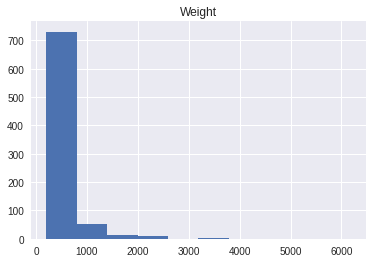

In [ ]:
df3.hist(column='Weight')